In [1]:
import pandas as pd
import numpy as np
import csv
import json
import random
import matplotlib.pyplot as plt

In [2]:
train_file = '/root/data/S10.json'
with open(train_file) as data_file:
    train_anns=json.load(data_file)

In [3]:
train_anns['annotations'][:1]

[{'sequence_level_annotation': True,
  'id': '4dec24e3-955a-11e9-8c32-000d3a198845',
  'category_id': 0,
  'seq_id': 'SER_S10#B03#1#1',
  'season': 'S10',
  'datetime': '2015-01-16 11:31:41',
  'subject_id': 'ASG001y55b',
  'count': nan,
  'standing': nan,
  'resting': nan,
  'moving': nan,
  'interacting': nan,
  'young_present': nan,
  'image_id': 'S10/B03/B03_R1/S10_B03_R1_IMAG0001',
  'location': 'B03'}]

In [4]:
f=open('img_list_fullname.txt','r')
file = f.read()
img_list = eval(file)
type(img_list)

img_list2 = []
for i in img_list:
    img_list2.append(i[:-4])

In [5]:
img_list2[:2]

['S10/O05/O05_R1/S10_O05_R1_IMAG2537', 'S10/C13/C13_R1/S10_C13_R1_IMAG1724']

In [8]:
label_dict = {}
for i in train_anns['annotations']:
    if i['image_id'] in img_list2:
        label_dict[i['image_id']]=i['category_id']

In [9]:
len(label_dict)

1000

In [10]:
df = pd.DataFrame.from_dict(label_dict,orient='index',columns=['label'])
df = df.reset_index().rename(columns={'index':'image_id'})
df.head()

,image_id,label
0,S10/B03/B03_R1/S10_B03_R1_IMAG0197,15
1,S10/B03/B03_R1/S10_B03_R1_IMAG1503,18
2,S10/B03/B03_R2/S10_B03_R2_IMAG0429,9
3,S10/B04/B04_R1/S10_B04_R1_IMAG0023,10
4,S10/B04/B04_R1/S10_B04_R1_IMAG0043,10


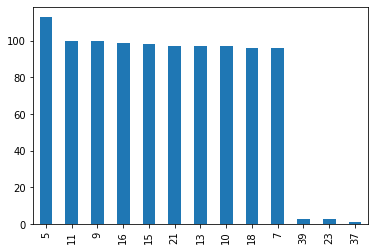

In [13]:
df['label'].value_counts().plot.bar()
plt.show()

In [12]:
df.label.unique()

array([15, 18,  9, 10,  7, 13, 11, 16,  5, 21, 39, 23, 37])

39 23 37 are not expected


In [14]:
df1 = df 

In [21]:
df1[df1['label']==39]

,image_id,label
84,S10/C08/C08_R1/S10_C08_R1_IMAG0178,39
650,S10/L10/L10_R2/S10_L10_R2_IMAG0101,39
827,S10/O08/O08_R1/S10_O08_R1_IMAG1430,39


In [24]:
df1.loc[df1['image_id']=='S10/C08/C08_R1/S10_C08_R1_IMAG0178']['label']=21
df1.loc[df1['image_id']=='S10/L10/L10_R2/S10_L10_R2_IMAG0101']['label']=21 
df1.loc[df1['image_id']=='S10/O08/O08_R1/S10_O08_R1_IMAG1430']['label']=21 

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [23]:
df1[df1['label']==39]

,image_id,label
84,S10/C08/C08_R1/S10_C08_R1_IMAG0178,39
650,S10/L10/L10_R2/S10_L10_R2_IMAG0101,39
827,S10/O08/O08_R1/S10_O08_R1_IMAG1430,39


In [18]:
df1[df1['label']==23]

,image_id,label
234,S10/E04/E04_R1/S10_E04_R1_IMAG0228,23
454,S10/I03/I03_R2/S10_I03_R2_IMAG0167,23
489,S10/I07/I07_R1/S10_I07_R1_IMAG0113,23


In [19]:
df1.loc[df1['image_id']=='S10/E04/E04_R1/S10_E04_R1_IMAG0228']['label']=10 

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df1[df1['image_id']=='S10/E04/E04_R1/S10_E04_R1_IMAG0228']

,image_id,label
234,S10/E04/E04_R1/S10_E04_R1_IMAG0228,23


In [15]:
df1.iloc[234,1]=10

In [16]:
df1.iloc[454,1]=13

In [17]:
df1.iloc[489,1]=15

In [18]:
df1.iloc[84,1]=21

In [19]:
df1.iloc[650,1]=21
df1.iloc[827,1]=21

In [20]:
df1.iloc[820,1]=7

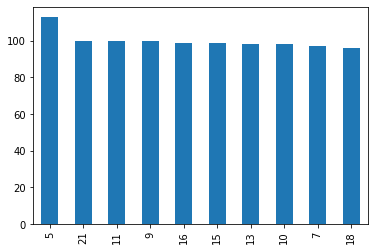

In [22]:
df1['label'].value_counts().plot.bar()
plt.show()

## Modeling

In [47]:
df1.head()

,image_id,label
0,S10/B03/B03_R1/S10_B03_R1_IMAG0197,15
1,S10/B03/B03_R1/S10_B03_R1_IMAG1503,18
2,S10/B03/B03_R2/S10_B03_R2_IMAG0429,9
3,S10/B04/B04_R1/S10_B04_R1_IMAG0023,10
4,S10/B04/B04_R1/S10_B04_R1_IMAG0043,10


In [23]:
import tensorflow as tf
import os
import random
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from shutil import copyfile
import numpy as np
import pandas  as pd
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [24]:
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout,Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32,(3,3), activation='relu', input_shape=(128,128,IMAGE_CHANNELS)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.









_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_____________

In [25]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [26]:
earlystop = EarlyStopping(patience=10)

In [27]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [28]:
callbacks = [earlystop, learning_rate_reduction]

In [32]:
df1.label.unique()

array([15, 18,  9, 10,  7, 13, 11, 16,  5, 21])

In [33]:
df1["label"] = df1["label"].replace({15: 'buffalo', 18: 'wildebeest',9:'warthog',10:'impala',7:'gazellethomsons',13:'giraffe',11:'elephant',16:'hartebeest',5:'zebra',21:'lionfemale'})

In [35]:
df1.label.unique()

array(['buffalo', 'wildebeest', 'warthog', 'impala', 'gazellethomsons',
       'giraffe', 'elephant', 'hartebeest', 'zebra', 'lionfemale'],
      dtype=object)

In [36]:
df1.tail()

,image_id,label
995,S10/T10/T10_R1/S10_T10_R1_IMAG1263,hartebeest
996,S10/T11/T11_R1/S10_T11_R1_IMAG0076,hartebeest
997,S10/T11/T11_R2/S10_T11_R2_IMAG0020,wildebeest
998,S10/T11/T11_R2/S10_T11_R2_IMAG0871,zebra
999,S10/T11/T11_R2/S10_T11_R2_IMAG1040,zebra


In [ ]:
df1['image_id']=df1['image_id']+'.JPG'

In [62]:
df1.tail()

,image_id,label
995,S10/T10/T10_R1/S10_T10_R1_IMAG1263.JPG,hartebeest
996,S10/T11/T11_R1/S10_T11_R1_IMAG0076.JPG,hartebeest
997,S10/T11/T11_R2/S10_T11_R2_IMAG0020.JPG,wildebeest
998,S10/T11/T11_R2/S10_T11_R2_IMAG0871.JPG,zebra
999,S10/T11/T11_R2/S10_T11_R2_IMAG1040.JPG,zebra


In [63]:
train_df, validate_df = train_test_split(df1, test_size=0.30, random_state=912)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [64]:
train_df.head()

,image_id,label
0,S10/M09/M09_R3/S10_M09_R3_IMAG0342.JPG,lionfemale
1,S10/H02/H02_R1/S10_H02_R1_IMAG1223.JPG,buffalo
2,S10/H07/H07_R1/S10_H07_R1_IMAG1291.JPG,hartebeest
3,S10/P13/P13_R3/S10_P13_R3_IMAG0060.JPG,hartebeest
4,S10/O05/O05_R1/S10_O05_R1_IMAG0281.JPG,hartebeest


In [65]:
validate_df.head()

,image_id,label
0,S10/I02/I02_R1/S10_I02_R1_IMAG0031.JPG,giraffe
1,S10/C11/C11_R1/S10_C11_R1_IMAG0445.JPG,giraffe
2,S10/K06/K06_R1/S10_K06_R1_IMAG0346.JPG,giraffe
3,S10/E04/E04_R2/S10_E04_R2_IMAG0301.JPG,impala
4,S10/Q12/Q12_R1/S10_Q12_R1_IMAG2096.JPG,warthog


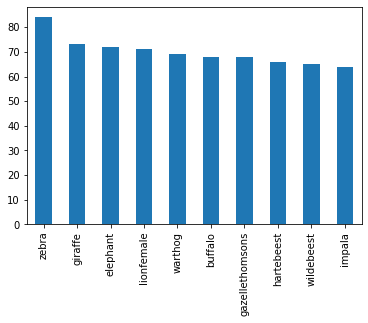

In [66]:
train_df['label'].value_counts().plot.bar()

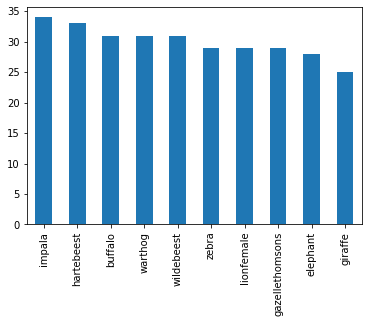

In [67]:
validate_df['label'].value_counts().plot.bar()

In [158]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size = 64

In [159]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

In [160]:
train_df['image_id'][:1]

0    S10/O08/O08_R2/S10_O08_R2_IMAG0080.JPG
Name: image_id, dtype: object

In [161]:
type(train_df['image_id'][:1])

pandas.core.series.Series

In [162]:
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    "/root/data/",
    x_col='image_id',
    y_col='label',
    target_size=(128,128),
    class_mode="categorical",
    batch_size=batch_size
)

Found 149 validated image filenames belonging to 2 classes.


In [163]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    '/root/data/',
    x_col='image_id',
    y_col='label',
    target_size=(128,128),
    class_mode = 'categorical'
)

Found 63 validated image filenames belonging to 2 classes.


/root/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 1 invalid image filename(s) in x_col="image_id". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [166]:
train_df[:1]['image_id']

0    S10/O08/O08_R2/S10_O08_R2_IMAG0080.JPG
Name: image_id, dtype: object

In [74]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df,
    "/root/data/",
    x_col = 'image_id',
    y_col = 'label',
    target_size=(128,128),
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


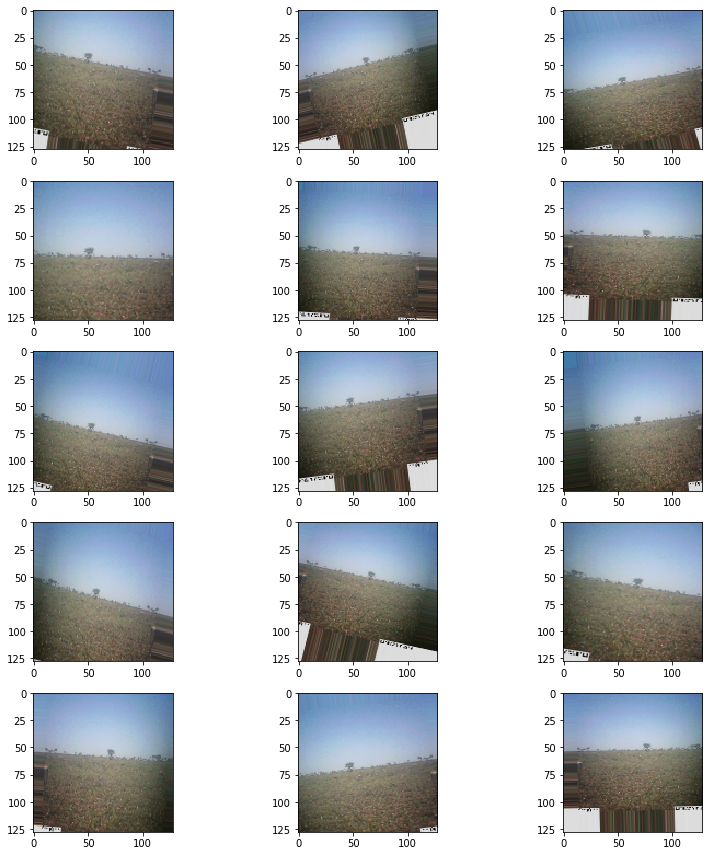

In [75]:
plt.figure(figsize=(12,12))
for i in range(0,15):
    plt.subplot(5,3,i+1)
    for X_batch, Y_batch in example_generator:
        image =X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [77]:
epochs =15
history = model.fit_generator(
    train_generator,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = total_validate//batch_size,
    steps_per_epoch = total_train//batch_size,
    callbacks=callbacks
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/15
70/70 [==============================] - 148s 2s/step - loss: 3.0000 - acc: 0.1446 - val_loss: 3.6407 - val_acc: 0.1033
Epoch 2/15
70/70 [==============================] - 99s 1s/step - loss: 2.7490 - acc: 0.1344 - val_loss: 6.0656 - val_acc: 0.1267
Epoch 3/15
70/70 [==============================] - 100s 1s/step - loss: 2.6183 - acc: 0.1659 - val_loss: 4.7498 - val_acc: 0.1467
Epoch 4/15
70/70 [==============================] - 100s 1s/step - loss: 2.5076 - acc: 0.1960 - val_loss: 3.3697 - val_acc: 0.1433
Epoch 5/15
70/70 [==============================] - 100s 1s/step - loss: 2.5255 - acc: 0.1773 - val_loss: 4.2129 - val_acc: 0.1533
Epoch 6/15
70/70 [==============================] - 99s 1s/step - loss: 2.4907 - acc: 0.1946 - val_loss: 5.2062 - val_acc: 0.1367
Epoch 7/15
70/70 [==============================] - 99s 1s/step - loss: 2.3574 - acc: 0.2162 - val_loss: 2.7611 - val_ac

In [80]:
model.save_weights('/root/model/model_15epochs.h5')

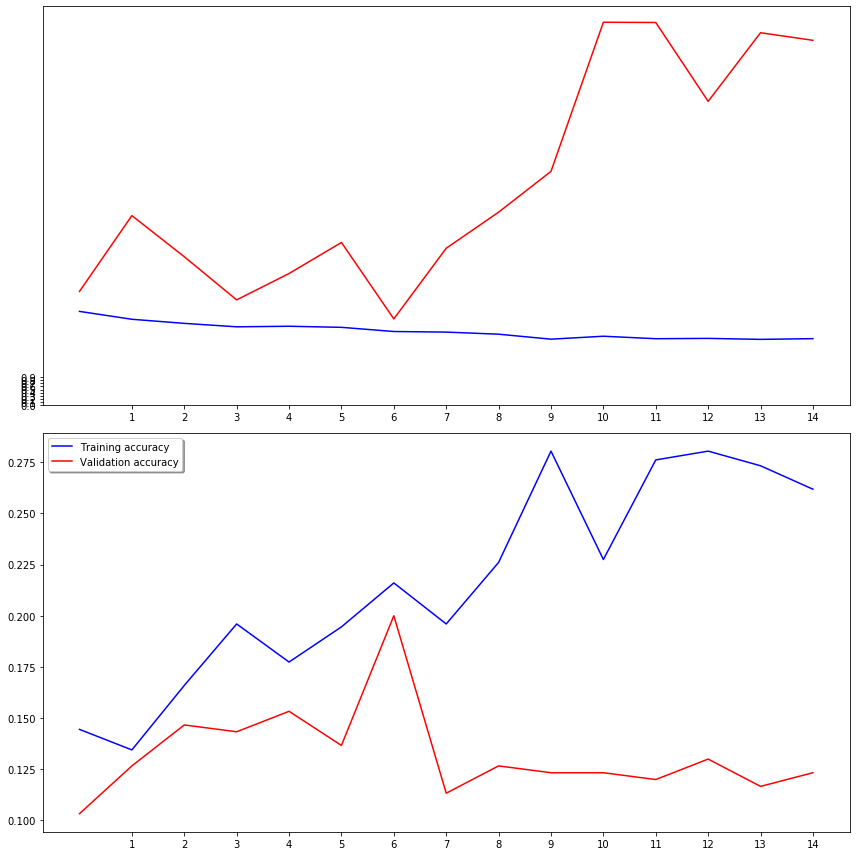

In [81]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

### model2- cnn baseline model 

https://www.kaggle.com/xhlulu/cnn-baseline-iwildcam-2019

In [86]:
import os
import json

import numpy as np
import pandas as pd
import keras
from keras.callbacks import Callback
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

In [84]:
model= Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(128,128,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

In [91]:
class Metrics(Callback):
    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []

    def on_epoch_end(self, epoch, logs={}):
        X_val, y_val = self.validation_data[:2]
        y_pred = self.model.predict(X_val)

        y_pred_cat = keras.utils.to_categorical(
            y_pred.argmax(axis=1),
            num_classes=num_classes
        )

        _val_f1 = f1_score(y_val, y_pred_cat, average='macro')
        _val_recall = recall_score(y_val, y_pred_cat, average='macro')
        _val_precision = precision_score(y_val, y_pred_cat, average='macro')

        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)

        print((f"val_f1: {_val_f1:.4f}"
               f" ? val_precision: {_val_precision:.4f}"
               f" ? val_recall: {_val_recall:.4f}"))

        return

In [92]:
batch_size = 64
num_classes = 10
epochs = 30
val_split = 0.1
save_dir = os.path.join(os.getcwd(), 'models')
model_name = 'keras_cnn_model.h5'

In [94]:
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/30
10/10 [==============================] - 22s 2s/step - loss: 3.1856 - acc: 0.0800 - val_loss: 2.3026 - val_acc: 0.0938
Epoch 2/30
10/10 [==============================] - 19s 2s/step - loss: 2.3027 - acc: 0.0300 - val_loss: 2.3014 - val_acc: 0.1094
Epoch 3/30
10/10 [==============================] - 17s 2s/step - loss: 2.3026 - acc: 0.1300 - val_loss: 2.3044 - val_acc: 0.0463
Epoch 4/30
10/10 [==============================] - 19s 2s/step - loss: 2.3024 - acc: 0.1400 - val_loss: 2.3013 - val_acc: 0.1094

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 5/30
10/10 [==============================] - 17s 2s/step - loss: 2.3050 - acc: 0.0900 - val_loss: 2.3016 - val_acc: 0.1111
Epoch 6/30
10/10 [==============================] - 18s 2s/step - loss: 2.3025 - acc: 0.1101 - val_loss: 2.3041 - val_acc: 0.0703
Epoch 7/30
10/10 [==============================] - 18s 2s/step - loss: 2.3042 - acc: 0.1200 - val_loss: 2.3020 - val_acc: 0.1172
Epoch 8/3

## improve!
not good either.
Next: try just 2 kinds of animals:

21: femalelion
5: zebra

In [137]:
# modeling

FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(128,128, IMAGE_CHANNELS)))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 28, 28, 64)        256       
__________

In [95]:
df1.label.unique()

array(['buffalo', 'wildebeest', 'warthog', 'impala', 'gazellethomsons',
       'giraffe', 'elephant', 'hartebeest', 'zebra', 'lionfemale'],
      dtype=object)

In [113]:
df3 = df1.loc[(df1['label'] =='zebra') | (df1['label']=='lionfemale')]

In [114]:
len(df3)

213

In [115]:
df3.head()

,image_id,label
30,S10/C01/C01_R1/S10_C01_R1_IMAG1607.JPG,zebra
31,S10/C01/C01_R1/S10_C01_R1_IMAG2432.JPG,zebra
66,S10/C04/C04_R1/S10_C04_R1_IMAG1539.JPG,zebra
67,S10/C04/C04_R1/S10_C04_R1_IMAG1547.JPG,zebra
69,S10/C04/C04_R1/S10_C04_R1_IMAG5093.JPG,zebra


In [116]:
df3.label.unique()

array(['zebra', 'lionfemale'], dtype=object)

In [123]:
train_df, validate_df = train_test_split(df3, test_size=0.30, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [120]:
len(train_df)

149

In [121]:
len(validate_df)

64

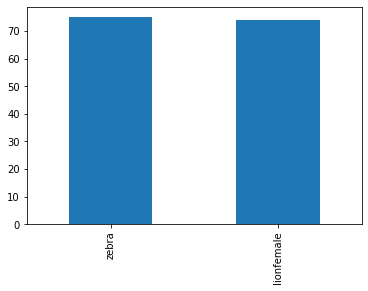

In [124]:
train_df['label'].value_counts().plot.bar()

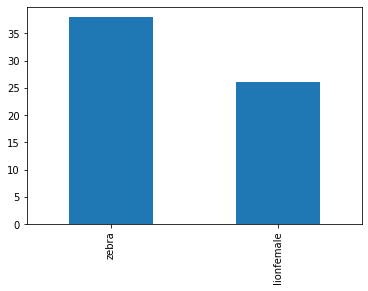

In [125]:
validate_df['label'].value_counts().plot.bar()

In [126]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=10

In [127]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

In [147]:
train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "/root/data/", 
    x_col='image_id',
    y_col='label',
    target_size=(128,128),
    class_mode='categorical',
    batch_size=batch_size
)

Found 149 validated image filenames belonging to 2 classes.


In [148]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/root/data/", 
    x_col='image_id',
    y_col='label',
    target_size=(128,128),
    class_mode='categorical',
    batch_size=batch_size
)

Found 63 validated image filenames belonging to 2 classes.


/root/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 1 invalid image filename(s) in x_col="image_id". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [138]:

epochs= 15
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/15
14/14 [==============================] - 15s 1s/step - loss: 1.1941 - acc: 0.5897 - val_loss: 4.3922 - val_acc: 0.3396
Epoch 2/15
14/14 [==============================] - 12s 867ms/step - loss: 1.0088 - acc: 0.5811 - val_loss: 3.1519 - val_acc: 0.6415
Epoch 3/15
14/14 [==============================] - 13s 934ms/step - loss: 0.7386 - acc: 0.6540 - val_loss: 3.7167 - val_acc: 0.5283
Epoch 4/15
14/14 [==============================] - 13s 924ms/step - loss: 0.8739 - acc: 0.6341 - val_loss: 8.7997 - val_acc: 0.4000

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 5/15
14/14 [==============================] - 13s 923ms/step - loss: 0.6021 - acc: 0.7357 - val_loss: 6.0658 - val_acc: 0.4340
Epoch 6/15
14/14 [==============================] - 13s 950ms/step - loss: 0.6856 - acc: 0.6683 - val_loss: 7.7639 - val_acc: 0.3962

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 7/15
14/14 [=========================

### try CNN BASELINE MODEL FROM kaggle iwildcam

In [149]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

In [150]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [151]:

epochs= 15
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/15
14/14 [==============================] - 13s 920ms/step - loss: 0.7343 - acc: 0.5286 - val_loss: 0.6960 - val_acc: 0.4667
Epoch 2/15
14/14 [==============================] - 11s 811ms/step - loss: 0.6827 - acc: 0.5890 - val_loss: 0.6446 - val_acc: 0.5849
Epoch 3/15
14/14 [==============================] - 12s 857ms/step - loss: 0.6691 - acc: 0.6040 - val_loss: 0.6871 - val_acc: 0.5660
Epoch 4/15
14/14 [==============================] - 12s 842ms/step - loss: 0.7019 - acc: 0.5461 - val_loss: 0.6603 - val_acc: 0.6981
Epoch 5/15
14/14 [==============================] - 12s 838ms/step - loss: 0.6626 - acc: 0.6262 - val_loss: 0.7157 - val_acc: 0.4906
Epoch 6/15
14/14 [==============================] - 12s 874ms/step - loss: 0.6711 - acc: 0.5761 - val_loss: 0.6623 - val_acc: 0.6981

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 7/15
14/14 [==============================] - 11s 802ms/step - loss: 0.6511 - acc: 0.6548 - val_loss: 0.6175 - val_

NameError: name 'model' is not defined

### Prepare testing data

In [1]:
train_df.describe()

NameError: name 'train_df' is not defined